# Clustring - Kumeleme

Clustring benzer nesnelerin veya verilerin gruplar halinde toplanmasini demektir. Bu projede arabalari benzerliklerine gore ayiracagiz.

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel('cars.xls')

In [5]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df.sample()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
107,35338.65369,25163,Cadillac,Deville,DHS Sedan 4D,Sedan,8,4.6,4,1,0,1


In [8]:
x=df[['Price','Mileage','Cylinder']]

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
model=KMeans(4)

In [38]:
model=model.fit(x)

In [39]:
tahmin=model.predict(x)

In [40]:
x['cluster']=tahmin

In [41]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,2


<Axes: xlabel='cluster', ylabel='count'>

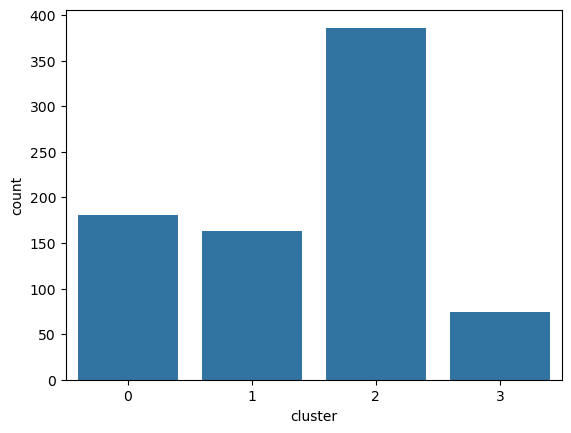

In [42]:
sns.countplot(x=x['cluster'])

In [43]:
silhouette_score(x,tahmin)

np.float64(0.4114527940599604)

In [44]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

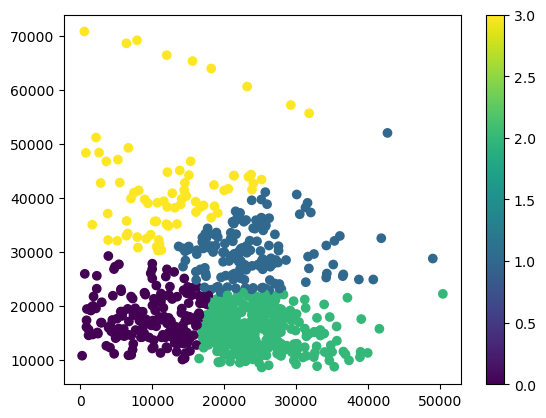

In [45]:
plt.scatter(x.Mileage,x.Price,c=tahmin)
plt.colorbar();

In [46]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.4517011884666373
0.4033924802492793
0.41179245164956324
0.35506406358201875
0.3479145087202195
0.3570623196325208
0.3375644951147315
0.3201686255150133


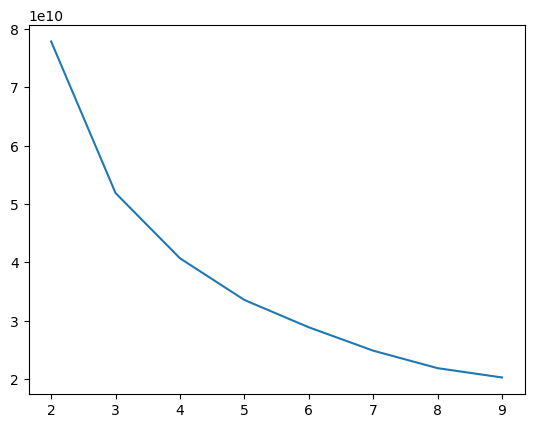

In [49]:
plt.plot(range(2,10),wcss) #dirsek nerede kiriliyorsa gruplama o kadar olmali

In [50]:
from yellowbrick.cluster import KElbowVisualizer

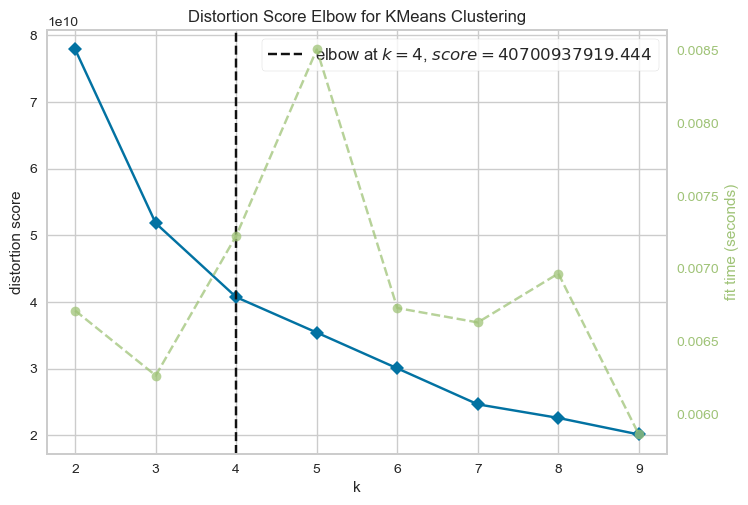

In [63]:
vis=KElbowVisualizer(KMeans(),k=(2,10))
vis.fit(x)
vis.show();

# Hierarchical Custring

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [68]:
data=linkage(x,method='ward',metric='euclidean')

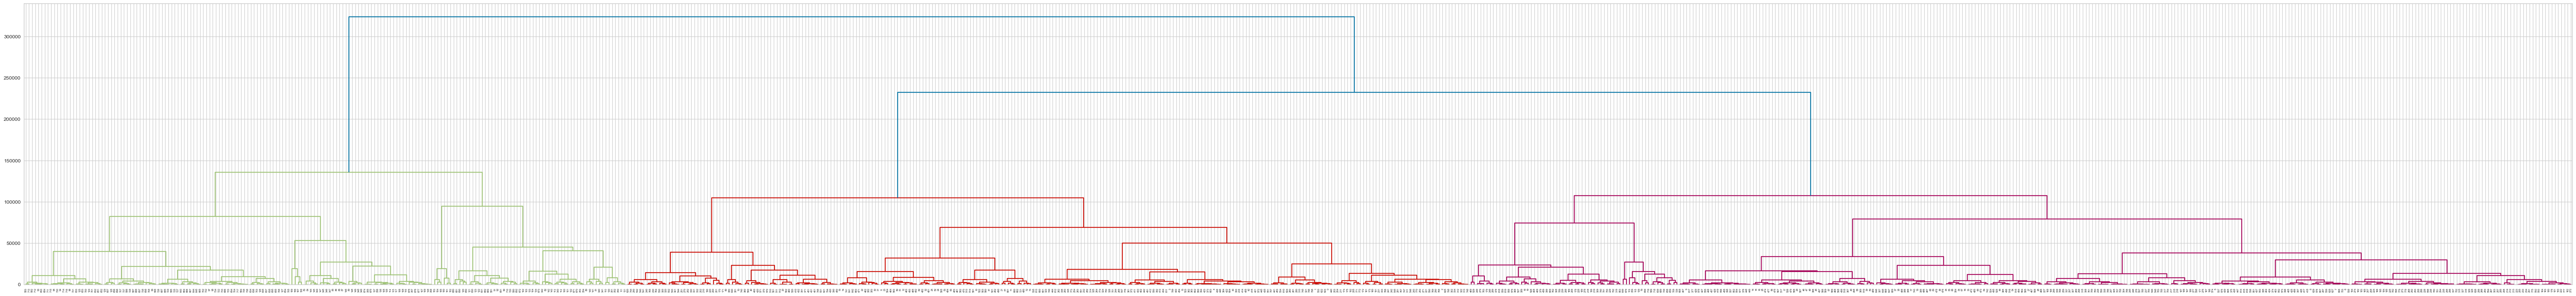

In [76]:
plt.figure(figsize=(90,10))
dendrogram(data);

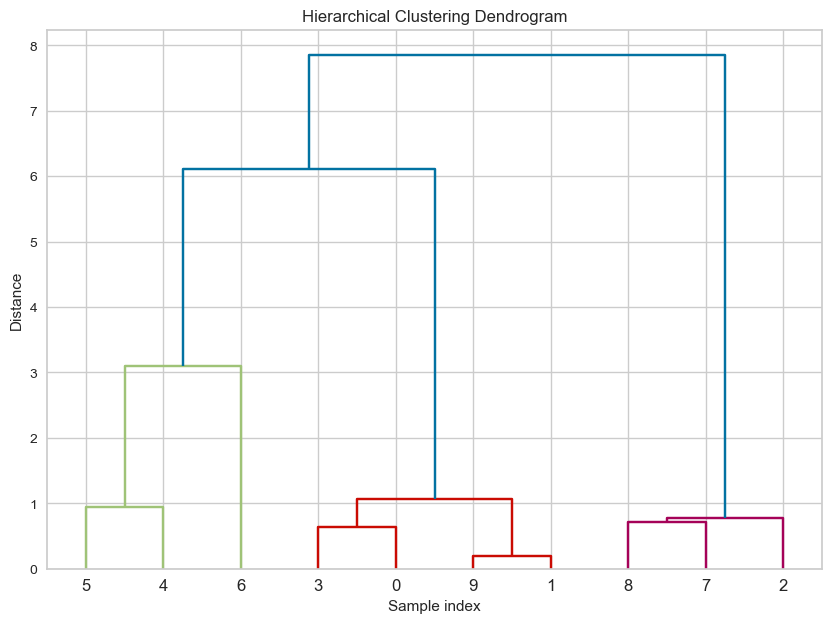

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, _ = make_blobs(n_samples=10, centers=3, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [77]:
from sklearn.cluster import DBSCAN

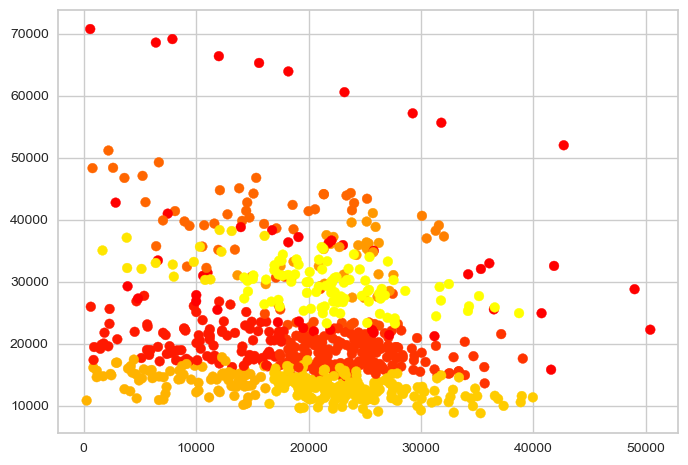

In [79]:
db=DBSCAN(min_samples=5)
from sklearn.preprocessing import StandardScaler
x2=StandardScaler().fit_transform(x)
y=db.fit_predict(x2)

plt.scatter(x['Mileage'],x['Price'],c=y,cmap='autumn');
plt.savefig('clustering.png', dpi=600)

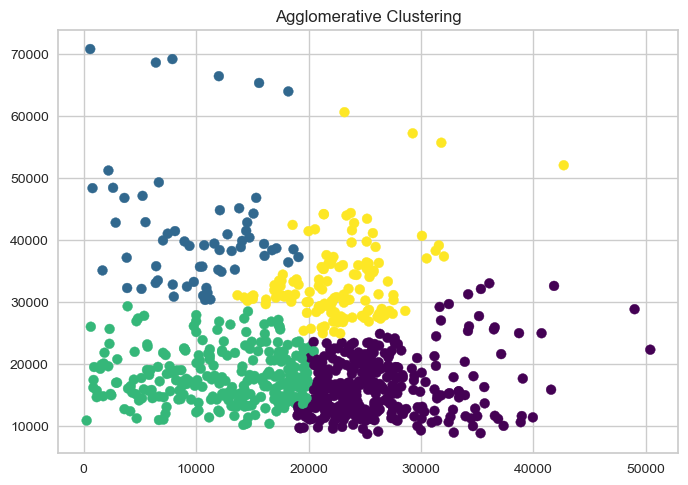

In [80]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(x)

# Plot the results
plt.scatter(x.Mileage, x.Price, c=y_agg, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()

In [81]:
df=pd.read_csv('Billionaires.csv')

In [82]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [83]:
df.tail(2)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2639,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,2.5,"$376,795,508,680",35.5,107.5,71.1,14.0,43.1,1.081166e+08,12.879721,121.774017


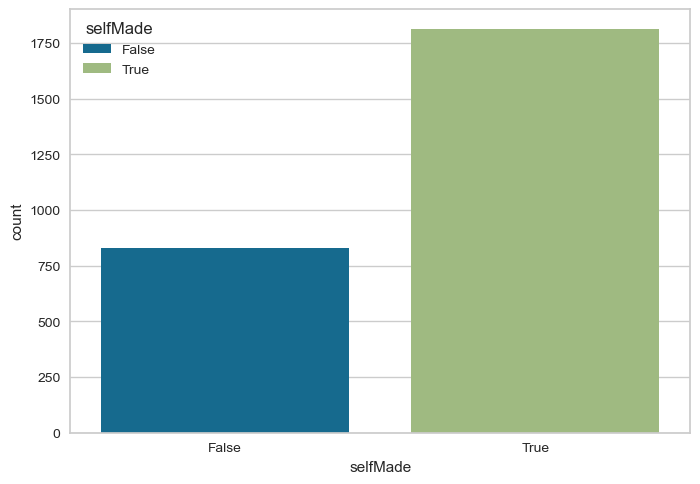

In [85]:
sns.countplot(x=df['selfMade'],hue=df['selfMade']);

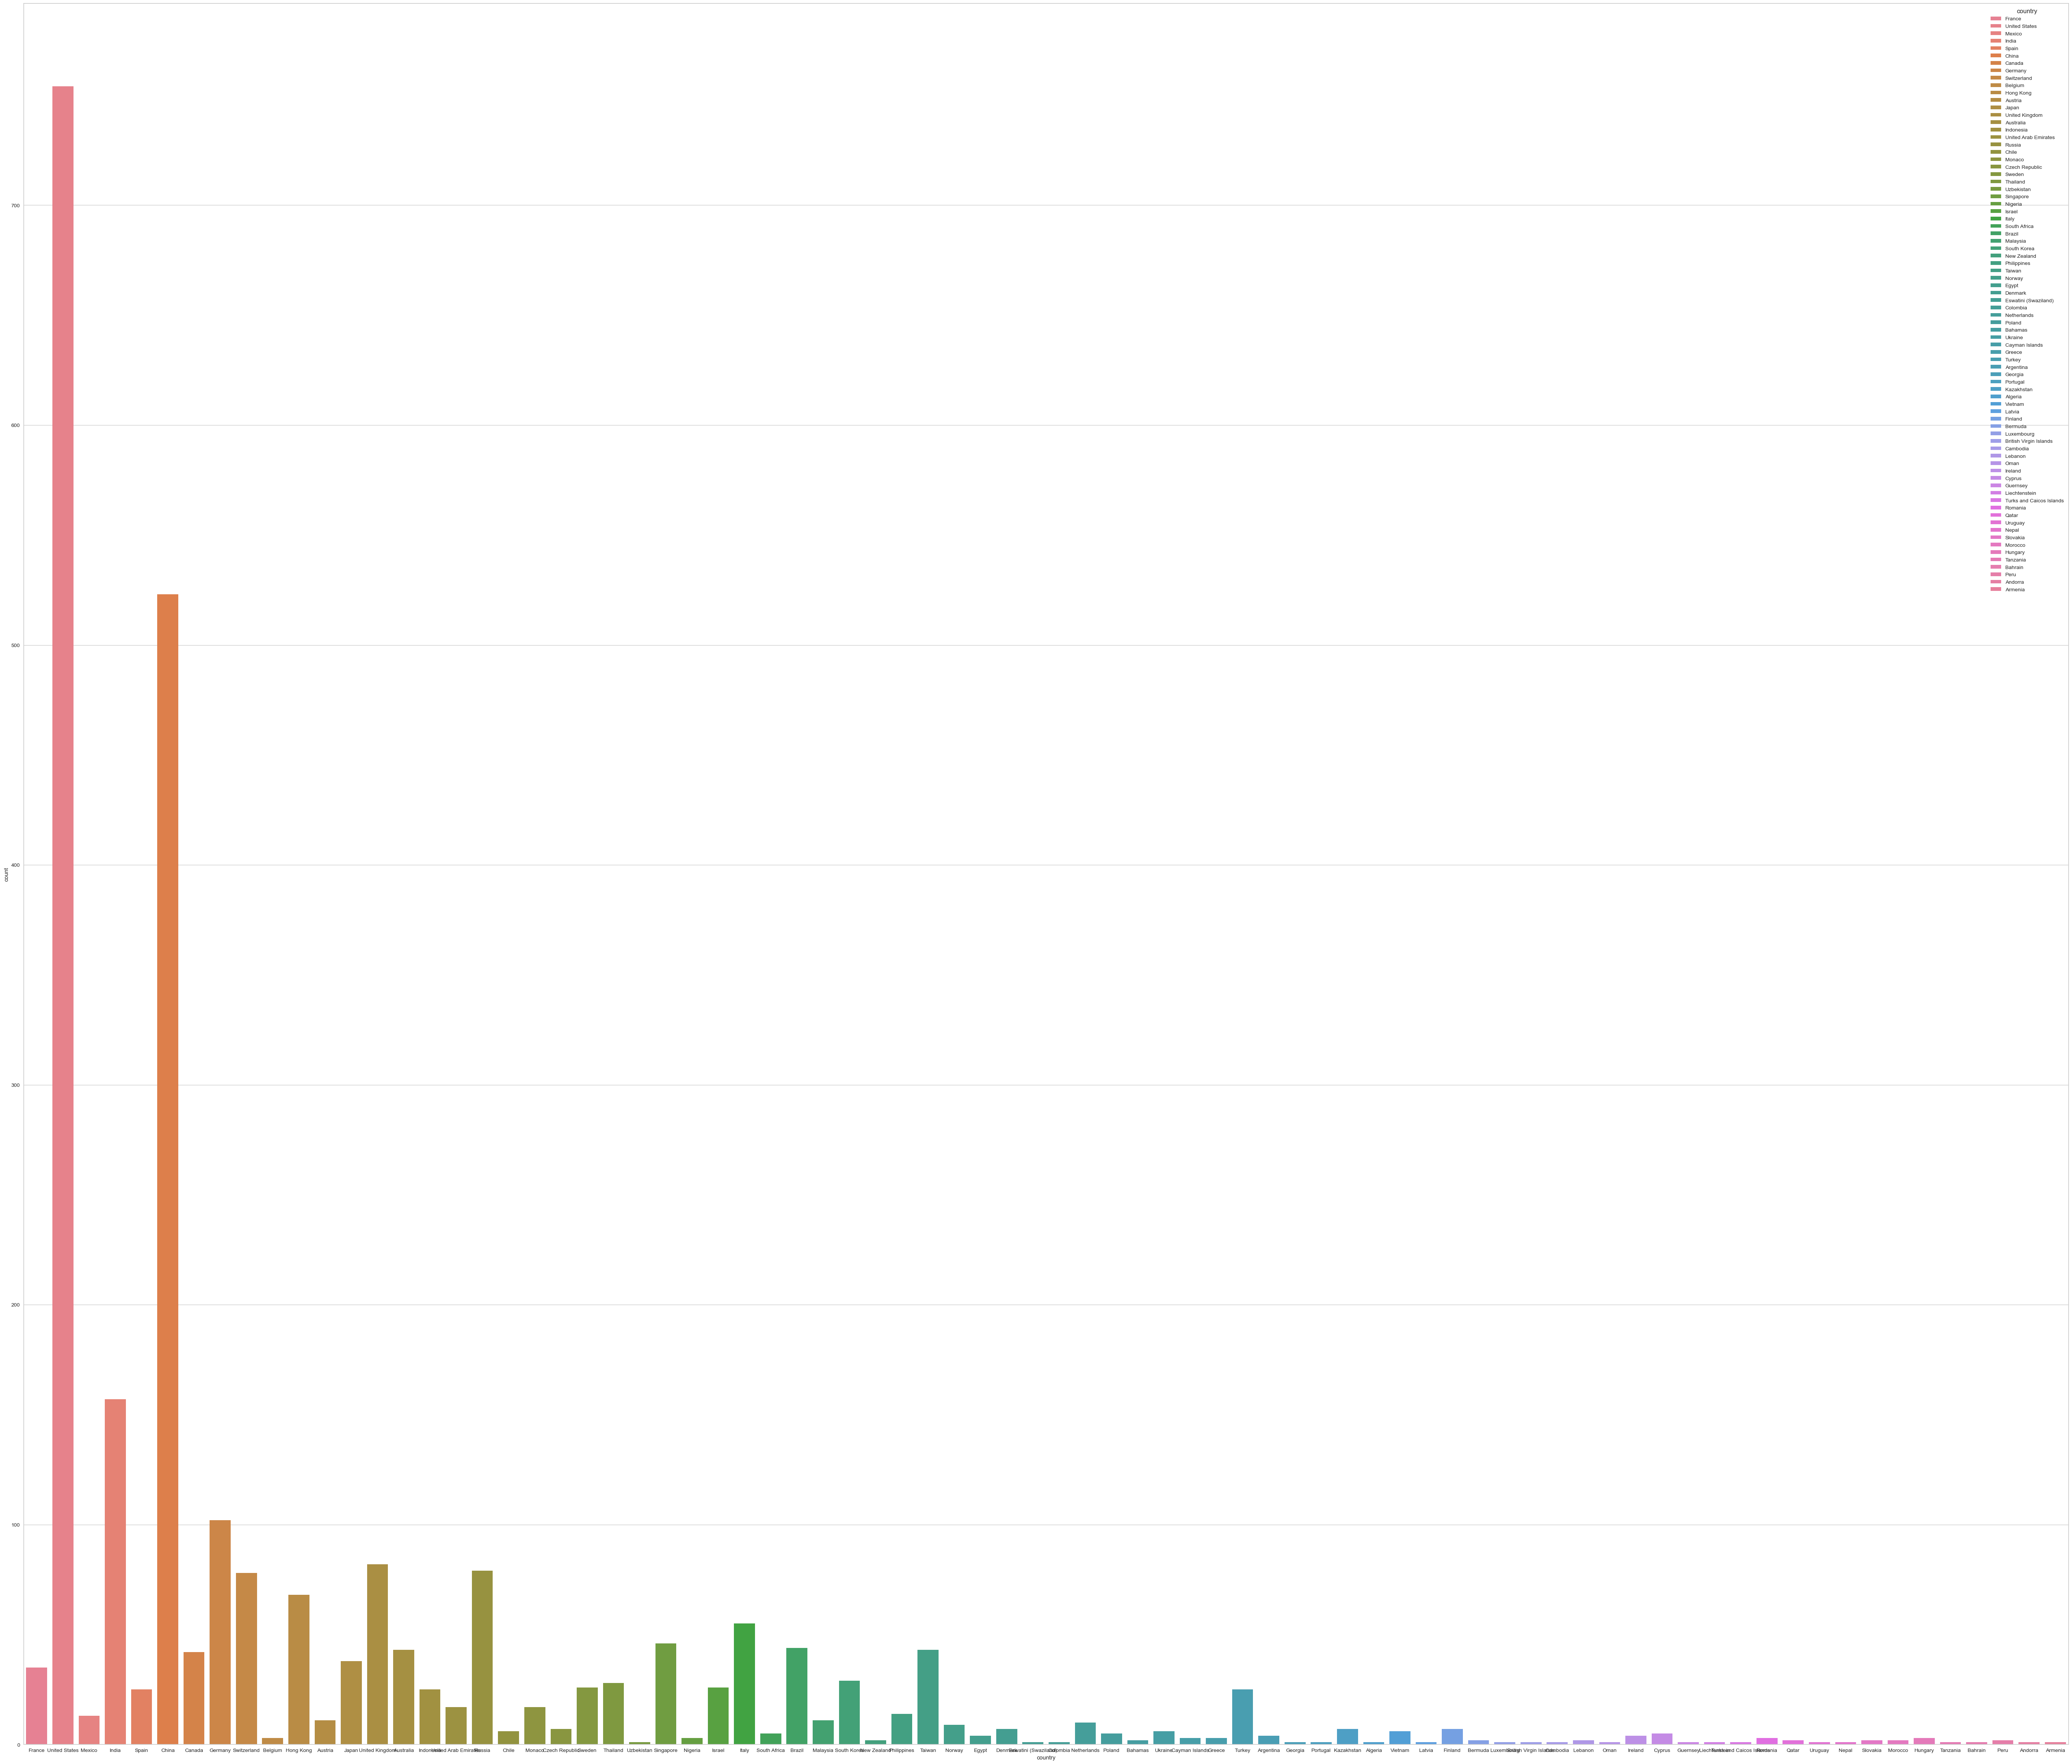

In [90]:
plt.figure(figsize=(70,60))
sns.countplot(x=df['country'],hue=df['country']);

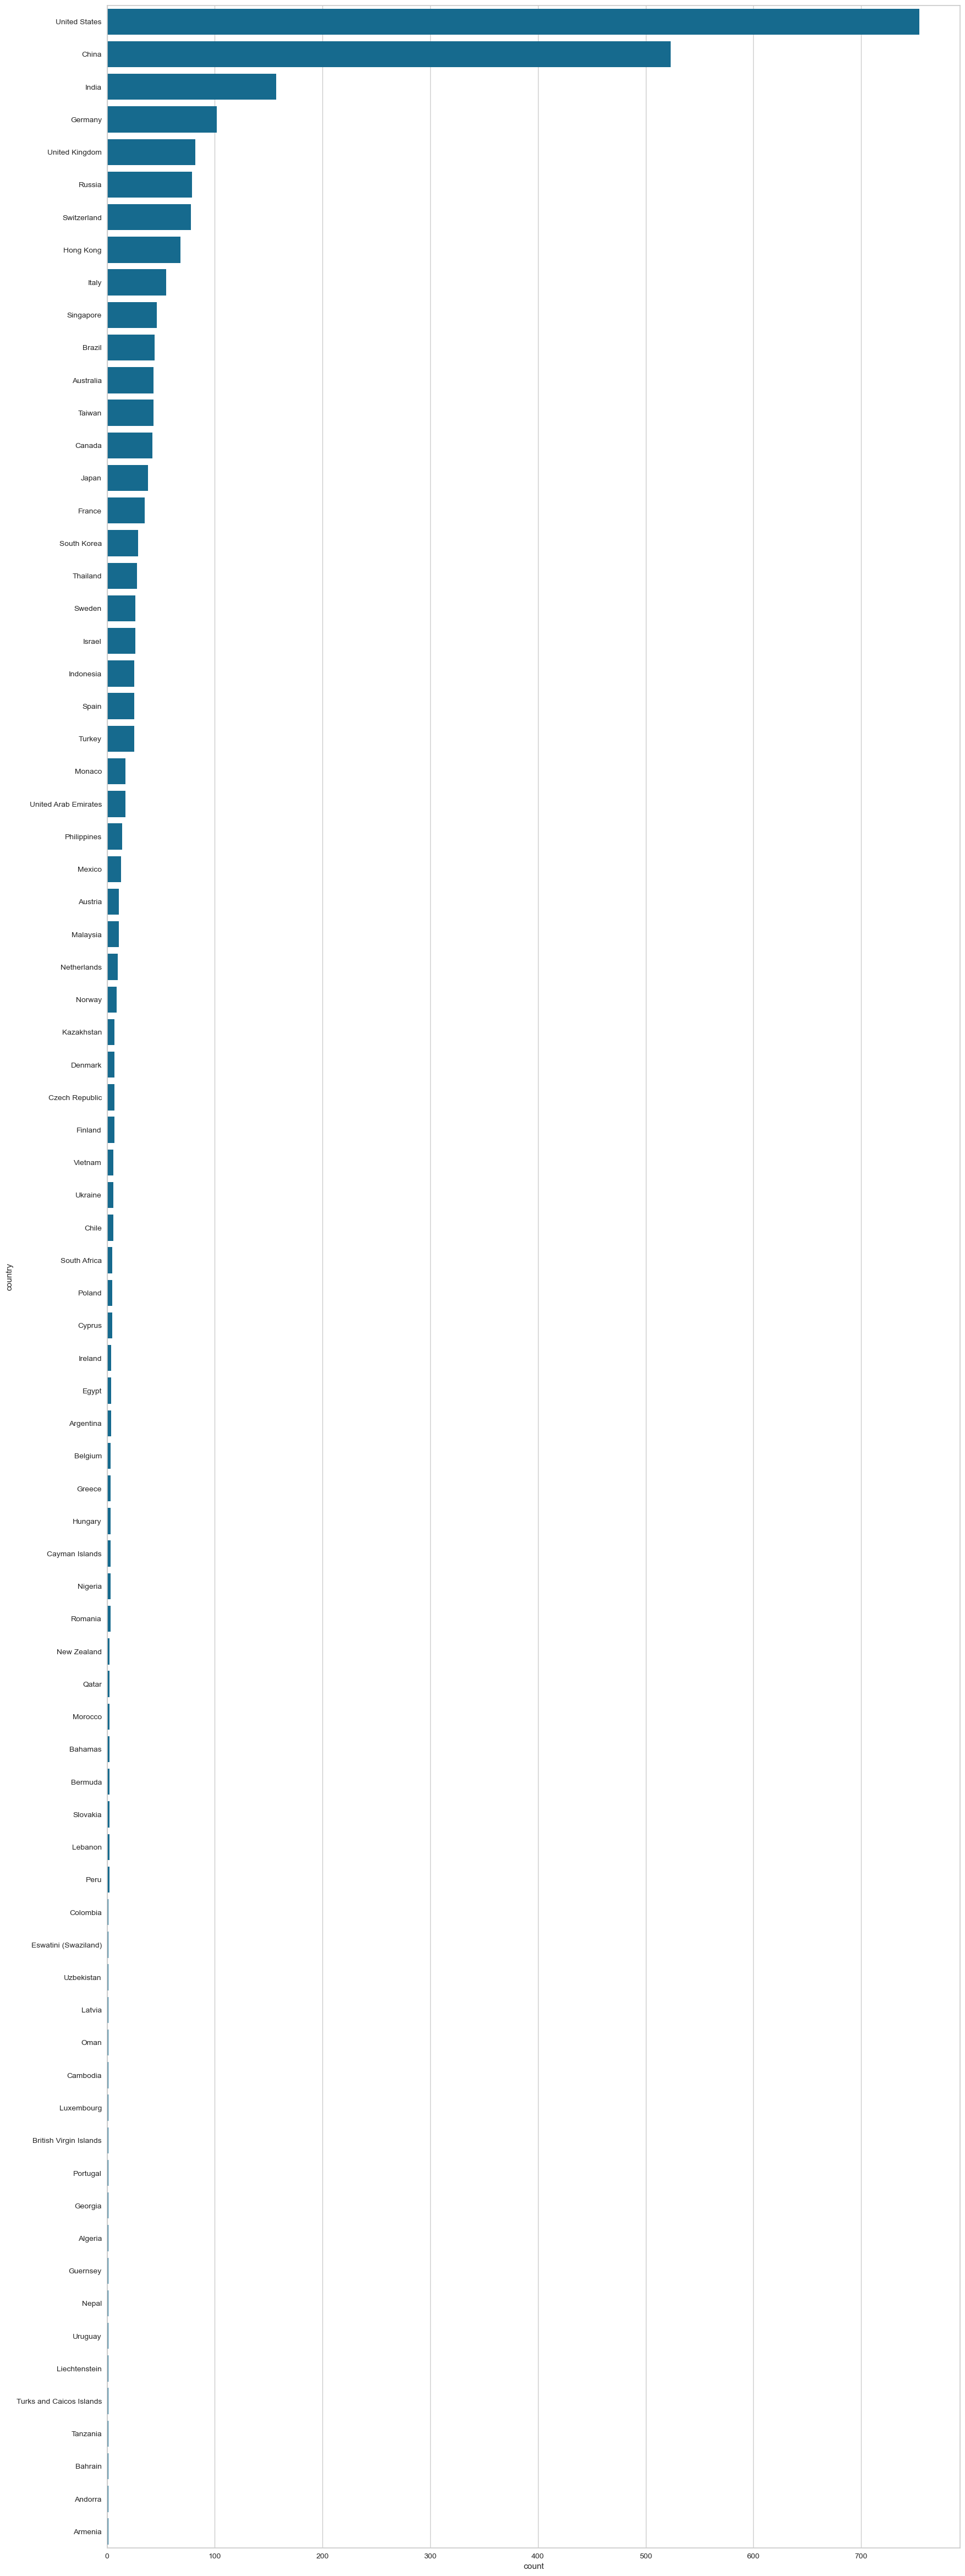

In [91]:
ydf=df['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'],order=ydf.index);

In [92]:
tr=df[df['country']=='Turkey']

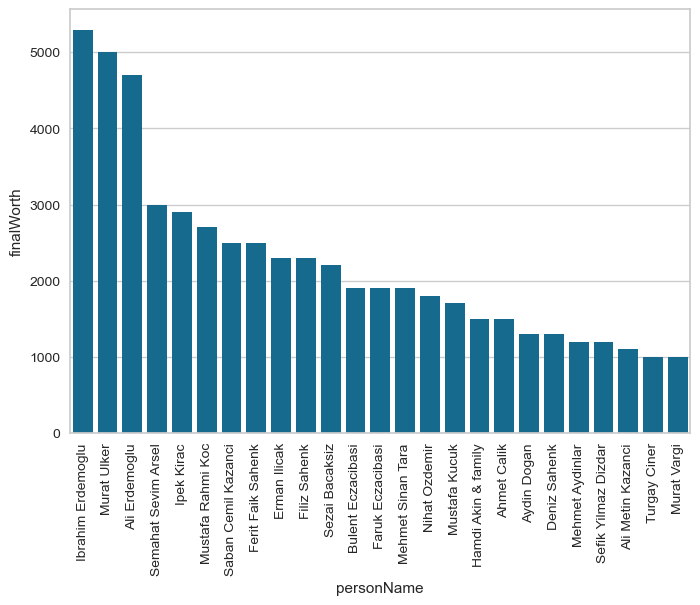

In [93]:
sns.barplot(x=tr['personName'],y=tr['finalWorth'])
plt.xticks(rotation=90);

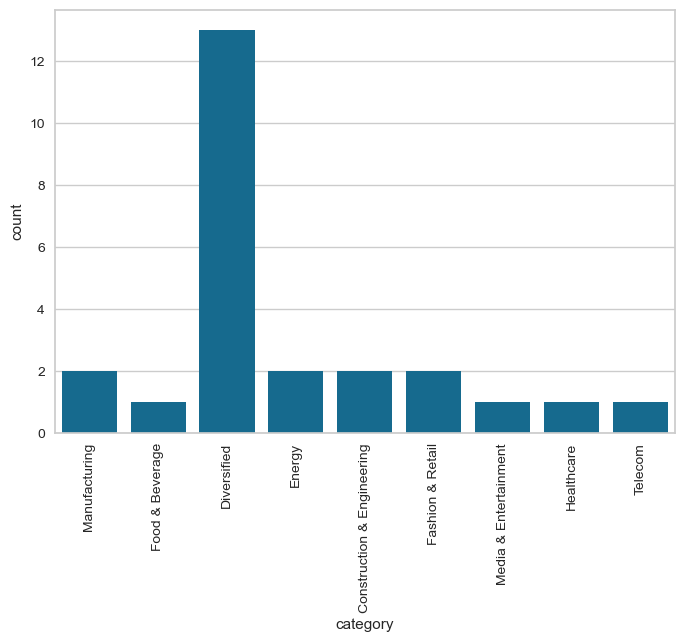

In [94]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=90)
plt.show()

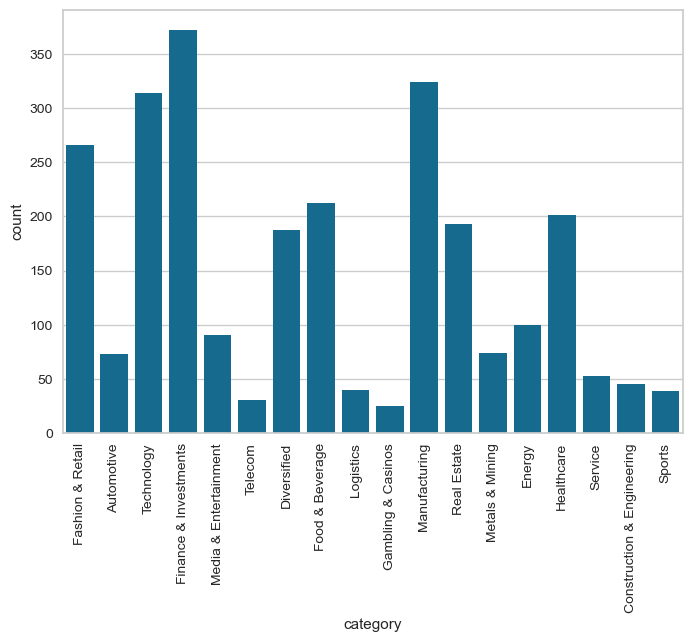

In [95]:
sns.countplot(x=df['category'])
plt.xticks(rotation=90)
plt.show()

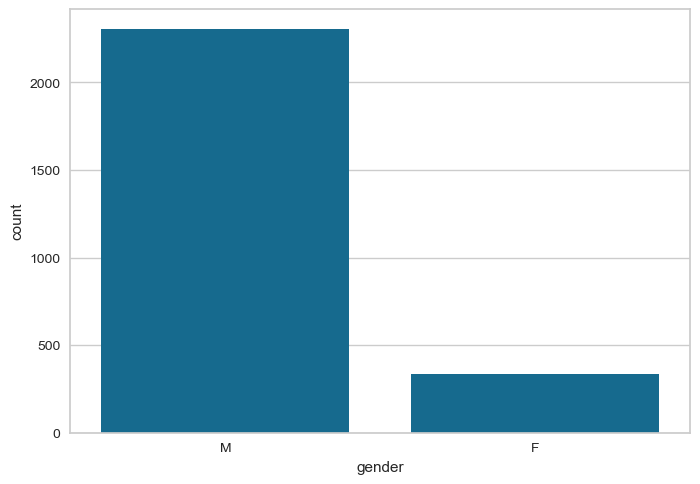

In [96]:
sns.countplot(x=df['gender']);